#### Dataset Iris

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)

In [2]:
X = X.loc[y.isin([0,1]), 'petal width (cm)'].values
y = y[y.isin([0,1])].values

#### Treino e teste

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Gráfico dos dados

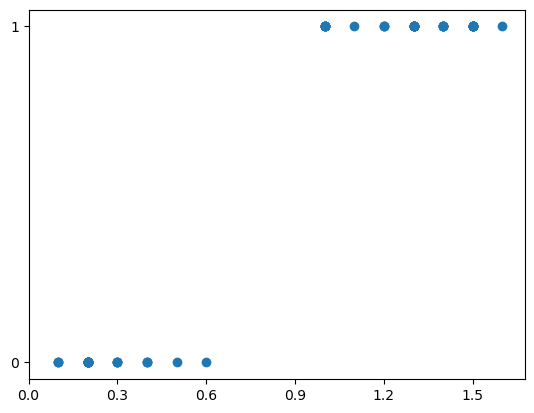

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.set(yticks=[0,1], xticks=[0,0.3,0.6,0.9,1.2,1.5])
plt.show()

#### Regressão Logística

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1), y_train)

In [6]:
ca, cl = clf.coef_[0][0], clf.intercept_[0]
f'Coeficiente angular: {ca}, coeficiente linear: {cl}'

'Coeficiente angular: 3.8516233283570824, coeficiente linear: -2.8330462856149343'

#### Gráficos dos dados e da curva

In [7]:
from scipy.special import expit
y_curva = expit(ca * X_train + cl)

In [8]:
import numpy as np
valores_x = np.linspace(X_train.min(), X_train.max(), 100)

In [9]:
valores_y = expit(ca * valores_x + cl)

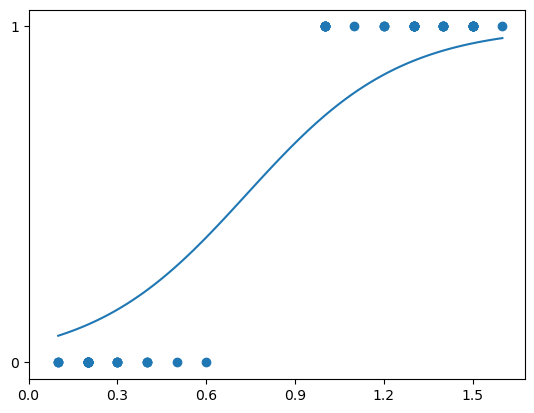

In [10]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)

ax.set(yticks=[0,1], xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

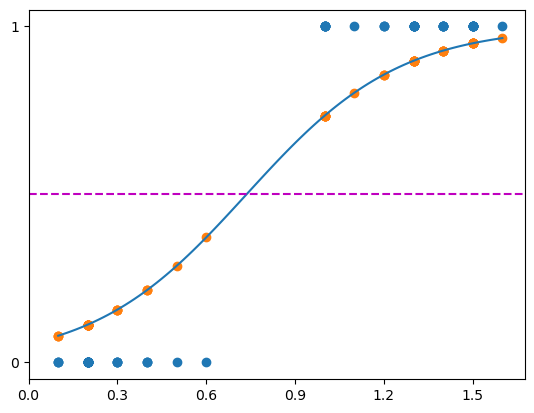

In [11]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.scatter(X_train, y_curva)
ax.plot(valores_x, valores_y)
ax.axhline(y=0.5, c='m', linestyle='--')

ax.set(yticks=[0,1], xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

#### Previsão e probabilidade

In [12]:
pred, prob = clf.predict(X_train.reshape(-1,1))[:5], clf.predict_proba(X_train.reshape(-1,1))[:5]
pred_prob = [pred, prob]

for i in range(len(pred)):
    print(f'Previsão = {pred[i]}, Probabilidade = {prob[i]}')

Previsão = 0, Probabilidade = [0.88722677 0.11277323]
Previsão = 1, Probabilidade = [0.26530467 0.73469533]
Previsão = 0, Probabilidade = [0.78455262 0.21544738]
Previsão = 1, Probabilidade = [0.05000239 0.94999761]
Previsão = 1, Probabilidade = [0.07180909 0.92819091]


#### Probabilidade dos dados de teste

In [13]:
y_pred_prob = clf.predict_proba(X_test.reshape(-1,1))

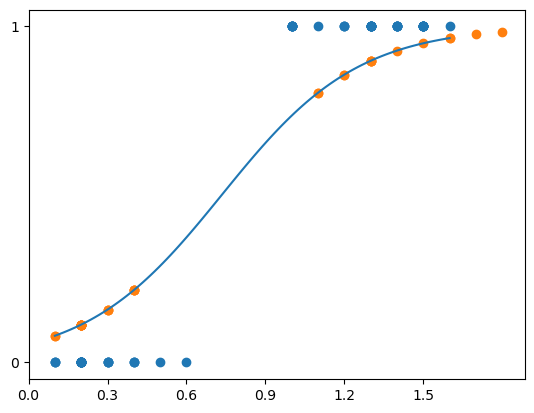

In [14]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)
ax.scatter(X_test, y_pred_prob[:,1])

ax.set(yticks=[0,1], xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

#### Avalição de erros

In [15]:
y_pred_valores = clf.predict(X_test.reshape(-1,1))

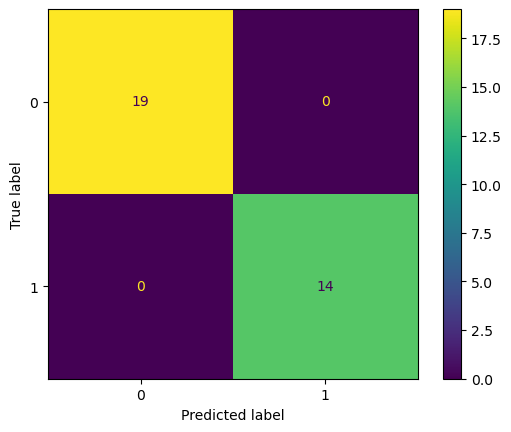

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_valores, labels=clf.classes_)
ConfusionMatrixDisplay(cm).plot();

#### Modelo com todos os dados

In [17]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
clf2 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [20]:
clf2.coef_

array([[-0.38854867,  0.85385235, -2.24492964, -0.95238248],
       [ 0.43789152, -0.3613421 , -0.12373814, -0.77276802],
       [-0.04934285, -0.49251025,  2.36866778,  1.72515049]])

In [21]:
clf2.intercept_

array([  8.69399165,   2.12547236, -10.81946401])

In [22]:
y_pred = clf2.predict(X_test)

#### Métricas do modelo com todos os dados

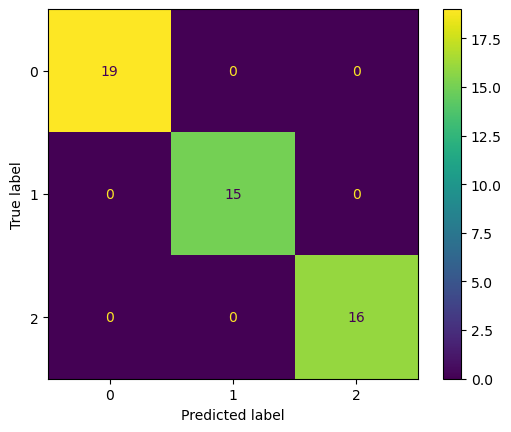

In [23]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
accuracy_score(y_test, y_pred) * 100

100.0

In [26]:
precision_score(y_test, y_pred, average='macro') * 100

100.0

In [27]:
recall_score(y_test, y_pred, average='macro') * 100

100.0